# Metro Bike Share
## by Ashwin Paramashivan

## Investigation Overview

The main goal is to dig deeper and determine what are the major factors that are causing the increasing demands in bike trips in Los Angeles, California in 2019. This could be the duration of bike trips, seasons, months and bike_type.

## Dataset Overview

This dataset is from the website call bikeshare.metro. his data provides total duration and the location of the bicycle. It also provides the latitude and the longituide of the location of the station where the bike originated and where the bike ended. There are multiple files and multiple years for this data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
q1 = pd.read_csv('metro-bike-share-trips-2019-q1.csv')
q2 = pd.read_csv('metro-bike-share-trips-2019-q2.csv')
q3 = pd.read_csv('metro-bike-share-trips-2019-q3.csv')
q4 = pd.read_csv('metro-bike-share-trips-2019-q4.csv')

q1['season'] = pd.Series('1', index=q1.index)
q2['season'] = pd.Series('2', index=q2.index)
q3['season'] = pd.Series('3', index=q3.index)
q4['season'] = pd.Series('4', index=q4.index)

bikedata2019 = q1.append([q2, q3, q4])

bikedata2019['trip_id'] = bikedata2019['trip_id'].astype(str)
bikedata2019['start_time'] = pd.to_datetime(bikedata2019['start_time'], infer_datetime_format=True)
bikedata2019['end_time'] = pd.to_datetime(bikedata2019['end_time'], infer_datetime_format=True)
bikedata2019['start_station'] = bikedata2019['start_station'].astype(str)
bikedata2019['end_station'] = bikedata2019['end_station'].astype(str)

bikedata2019 = bikedata2019.dropna(inplace=False)

bikedata2019['month'] = bikedata2019['start_time'].dt.month
bikedata2019.drop('season', axis=1, inplace=True)
bikedata2019['season'] = ((bikedata2019['month'])%12 + 3)//3 

bikedata2019['season'] = bikedata2019['season'].astype(str)
bikedata2019['month'] = bikedata2019['month'].astype(str)

seasons = ['winter', 'spring', 'summer', 'fall']
nums = ['1', '2', '3', '4']
for i in range(4):
    bikedata2019['season'] = bikedata2019['season'].replace([nums[i]], seasons[i])

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_vals = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
for i in range(12):
    bikedata2019['month'] = bikedata2019['month'].replace([month_vals[i]], months[i])

bikedata2019.shape

(276943, 17)

In [3]:
bikedata2019 = bikedata2019[bikedata2019['duration'] < 45]

## Distribution of Duration

This graph is skewed to the right. The shorter the duration then there are more numbers of bike trips conducted. This could be due to the cost associated with the trip length. For instance, longer duration would be expensive, so that is why many prefered shorter duration.

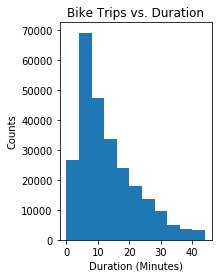

In [4]:
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, bikedata2019['duration'].max()+4, 4)
plt.hist(data = bikedata2019, x = 'duration', bins = bin_edges);
plt.xlabel('Duration (Minutes)');
plt.ylabel('Counts');
plt.title('Bike Trips vs. Duration');

## The relationship of Bike Trips vs. Months

Usually the bike trips are more in demand in the summer and fall months. August, September  and October have the highest numbers of bike riders since they are the warmest months in Los Angeles. 

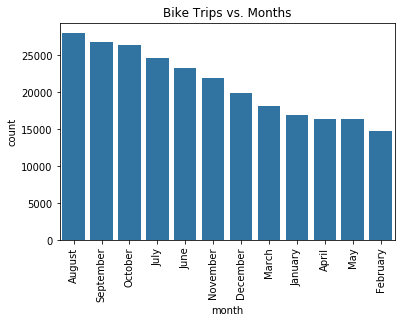

In [5]:
base_color = sb.color_palette()[0]
month_order = bikedata2019['month'].value_counts().index
sb.countplot(data=bikedata2019, x='month', color= base_color, order = month_order);
plt.xticks(rotation=90);
plt.title('Bike Trips vs. Months');

## Months with the most bike trips according to bike types 

In the months of August, September and October there has been more trips conducted with electric bikes than standard bikes. That is because in Los Angeles those are the hottest months and with sufficient amount of sunlight, the electric bikes charges better. They require less effort for pedelling but they come at a higher price. So many people wanted to go with the cheaper option. In the months of January to April, there were very little number of people using electric bikes because it is not highly recommended to use electric bikes in the winter. The trips conducted with smart bikes is less because they cost more than standard and electric bikes. 

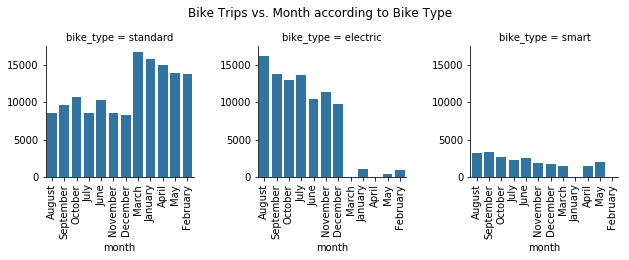

In [6]:
g = sb.FacetGrid(bikedata2019, col='bike_type');
g.map(sb.countplot, "month", order=month_order);
g.set_xticklabels(rotation = 90);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Bike Trips vs. Month according to Bike Type');

## Bike Trips according to season and trip route category

It can be shown that more trips were one way rather than round trip regardless of which season it is. This can be due to the cost of making a round trip.

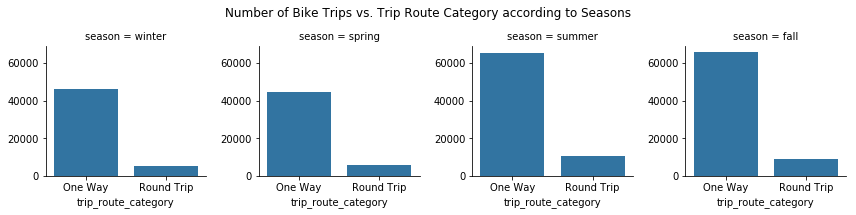

In [7]:
g = sb.FacetGrid(bikedata2019, col='season');
g.map(sb.countplot, 'trip_route_category');
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Number of Bike Trips vs. Trip Route Category according to Seasons");

## Trips conducted according to season and bike type

For every season and bike types, the shorter duration has caused more bike trips. 

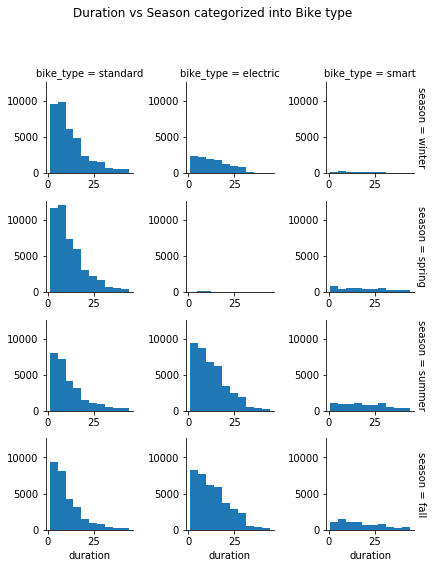

In [8]:
g = sb.FacetGrid(data=bikedata2019, col = 'bike_type', row = 'season', size = 2, margin_titles=True);
g.map(plt.hist, 'duration');
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Duration vs Season categorized into Bike type");

## Summary

The main causes for am increasing demands of bike trips are due to one of the following reasons:

- Shorter Duration
- Warmer months
- Bike types
- One Way trips

In [9]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'slide_deck_template.ipynb'])

0